In [1]:
#  Optimisation et Interprétation du Modèle  

# Ce notebook a pour but :  d’**optimiser les hyperparamètres** du meilleur modèle (Forêt Aléatoire),   d’évaluer sa **performance finale** sur le jeu de test,  et d’**analyser l’importance des variables** dans la prédiction.  


In [2]:
import os
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# --- Configuration du répertoire
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

print(" Dossier courant :", os.getcwd())

# --- Chargement des jeux de données préparés
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv").squeeze("columns")
y_test = pd.read_csv("data/y_test.csv").squeeze("columns")

print(" Données chargées :")
print(f"X_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")


 Dossier courant : c:\Users\selma\Desktop\projet_seattle
 Données chargées :
X_train : (1211, 5083)
X_test  : (303, 5083)


In [4]:
# --- Définition du modèle de base
model = RandomForestRegressor(random_state=42)

# --- Grille d’hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# --- Configuration de la recherche par validation croisée
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# --- Lancement de la recherche
grid_search.fit(X_train, y_train)

print("\n Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_


Fitting 3 folds for each of 27 candidates, totalling 81 fits

 Meilleurs paramètres trouvés :
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [5]:
# --- Prédiction sur le jeu de test
y_pred = best_model.predict(X_test)

# --- Calcul des métriques
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n Performance finale du modèle optimisé :")
print(f"R²  : {r2:.3f}")
print(f"MAE : {mae:.3f}")



 Performance finale du modèle optimisé :
R²  : 0.876
MAE : 749339.200


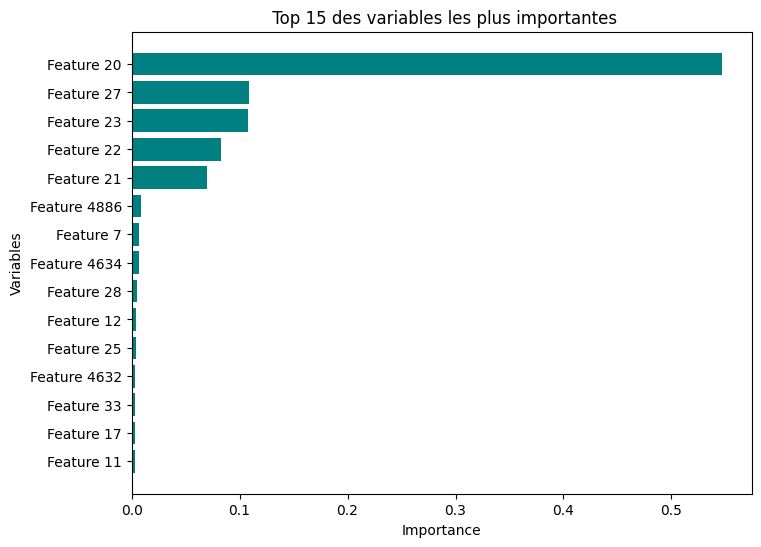

In [6]:
# --- Analyse des features importantes
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[-15:]  # Top 15

    plt.figure(figsize=(8,6))
    plt.barh(range(len(indices)), importances[indices], align="center", color="teal")
    plt.yticks(range(len(indices)), [f"Feature {i}" for i in indices])
    plt.title(" Top 15 des variables les plus importantes")
    plt.xlabel("Importance")
    plt.ylabel("Variables")
    plt.show()
else:
    print(" Le modèle ne possède pas d'attribut feature_importances_.")
